# RISK ANALYSIS AND CREDIT GRANT

## SOLUTION PLANNING

# 1.0 - IMPORTS


## 1.1 - LIBRARIES

In [523]:
import pandas               as pd
import numpy                as np
import inflection
import matplotlib.pyplot    as plt
import seaborn              as sns
import re
from imblearn.over_sampling import SMOTE
from collections            import Counter
from sklearn.preprocessing  import StandardScaler

## 1.2 - LOAD DATA

In [524]:
df_raw = pd.read_csv('../dataset/credit_analysis.csv')

## 1.3 - HELPER FUNCTIONS

### 1.3.1 - PLOT DIMENSIONS

In [525]:
sns.set_theme(rc = {'figure.figsize':(13,5)})


### 1.3.2 - OUTLIERS VOLUMETRY

In [526]:
def outliers_volumetry(data):
    
    df_num = pd.DataFrame()
    df_num = data.select_dtypes(exclude = 'object')
    outlier = []

    for i in df_num.columns:
        q1 = np.quantile(df_num[i], 0.25)
        q3 = np.quantile(df_num[i], 0.75)
        interquartile_distance = q3 - q1
        upper_limit = q3 + 1.5 * interquartile_distance
        lower_limit = q1 - 1.5 * interquartile_distance
        outliers = 0
        for j in df_num.index:
            if df_num[i][j] > upper_limit:
                outliers = outliers + 1
            elif df_num[i][j] < lower_limit:
                outliers = outliers + 1
            else:
                pass

        outlier.append(outliers)

    df_outlier = pd.DataFrame()
    df_outlier['attributes']    = df_num.columns
    df_outlier['quantity']      =   outlier
    df_outlier['percentual']    =   (outlier/df_num['customer_id'].count())*100
    df_outlier['percentual'] = df_outlier['percentual'].apply(lambda x: f"{x:.2f}%")

    return df_outlier    

# 2.0 - DATA DESCRIPTION

In [527]:
df2 = df_raw.copy()

## 2.1 - DATA DIMENSION

In [528]:
print('Number of Rows: {}'.format(df2.shape[0]))
print('Number of Columns: {}'.format(df2.shape[1]))
print('Number of unique features')
df2.apply(lambda x: x.nunique())

Number of Rows: 100000
Number of Columns: 26
Number of unique features


Unnamed: 0             100000
customer id             12500
day month                   8
age                        43
occupation                 15
annual salary           12488
num bank accounts          12
cards num                  12
loan interest              34
num loans                  10
days late payment          63
qtd late payments          26
credit checks              18
credit mix                  3
total debt              12203
credit usage fee       100000
credit history age        404
monthly investment      12261
payment behavior            6
final balance month     98494
credit score                3
car loan                    2
home loan                   2
personal loan               2
credit loan                 2
student loan                2
dtype: int64

## 2.2 - RENAME COLUMNS

In [529]:
df2.columns

Index(['Unnamed: 0', 'customer id', 'day month', 'age', 'occupation',
       'annual salary', 'num bank accounts', 'cards num', 'loan interest',
       'num loans', 'days late payment', 'qtd late payments', 'credit checks',
       'credit mix', 'total debt', 'credit usage fee', 'credit history age',
       'monthly investment', 'payment behavior', 'final balance month',
       'credit score', 'car loan', 'home loan', 'personal loan', 'credit loan',
       'student loan'],
      dtype='object')

In [530]:
df2 = df2.drop(columns = {'Unnamed: 0'}, axis=1)


In [531]:
def to_snake_case(column_name):
    # Substituir espaços por underscores
    column_name = column_name.replace(' ', '_')
    # Colocar um sublinhado antes das letras maiúsculas e converter para minúsculas
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', column_name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

# Atualizando os nomes das colunas no DataFrame
old_columns = df2.columns
new_columns = [to_snake_case(col) for col in old_columns]
df2.columns = new_columns

# Verificando o resultado final
df2.columns

Index(['customer_id', 'day_month', 'age', 'occupation', 'annual_salary',
       'num_bank_accounts', 'cards_num', 'loan_interest', 'num_loans',
       'days_late_payment', 'qtd_late_payments', 'credit_checks', 'credit_mix',
       'total_debt', 'credit_usage_fee', 'credit_history_age',
       'monthly_investment', 'payment_behavior', 'final_balance_month',
       'credit_score', 'car_loan', 'home_loan', 'personal_loan', 'credit_loan',
       'student_loan'],
      dtype='object')

## 2.3 - DATA TYPES

In [532]:
df2.dtypes

customer_id              int64
day_month                int64
age                    float64
occupation              object
annual_salary          float64
num_bank_accounts      float64
cards_num              float64
loan_interest          float64
num_loans              float64
days_late_payment      float64
qtd_late_payments      float64
credit_checks          float64
credit_mix              object
total_debt             float64
credit_usage_fee       float64
credit_history_age     float64
monthly_investment     float64
payment_behavior        object
final_balance_month    float64
credit_score            object
car_loan                 int64
home_loan                int64
personal_loan            int64
credit_loan              int64
student_loan             int64
dtype: object

In [533]:
df2['age'] = df2['age'].astype(int)

## 2.4 - NA VOLUMETRY

In [534]:
df2.isna().sum()

customer_id            0
day_month              0
age                    0
occupation             0
annual_salary          0
num_bank_accounts      0
cards_num              0
loan_interest          0
num_loans              0
days_late_payment      0
qtd_late_payments      0
credit_checks          0
credit_mix             0
total_debt             0
credit_usage_fee       0
credit_history_age     0
monthly_investment     0
payment_behavior       0
final_balance_month    0
credit_score           0
car_loan               0
home_loan              0
personal_loan          0
credit_loan            0
student_loan           0
dtype: int64

## 2.5 - OUTLIER VOLUMETRY

In [535]:
outliers_volumetry(df2)

,attributes,quantity,percentual
0,customer_id,0,0.00%
1,day_month,0,0.00%
2,age,0,0.00%
3,annual_salary,2000,2.00%
4,num_bank_accounts,0,0.00%
5,cards_num,0,0.00%
6,loan_interest,0,0.00%
7,num_loans,0,0.00%
8,days_late_payment,4002,4.00%
9,qtd_late_payments,0,0.00%


# 3.0 - DESCRIPTIVE STATISTICAL

In [536]:
df3 = df2.copy()

In [537]:
num_attributes = df3.select_dtypes(include = ['int64', 'float64'])
cat_attributes = df3.select_dtypes(include = 'object')

In [538]:
# central tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T
             
# dispersion - desvio padrão, minimo, maximo, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( np.min ) ).T
d3 = pd.DataFrame( num_attributes.apply( np.max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'mediana', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,mediana,std,skew,kurtosis
0,customer_id,1006.00000,50999.000000,49993.000000,25982.666640,25777.000000,14340.471348,0.011057,-1.187935
1,day_month,1.00000,8.000000,7.000000,4.500000,4.500000,2.291288,0.000000,-1.238097
2,age,14.00000,56.000000,42.000000,33.316340,33.000000,10.764758,0.156338,-0.926811
3,annual_salary,7005.93000,179987.280000,172981.350000,50505.123449,36999.705000,38299.230595,1.130223,0.608152
4,num_bank_accounts,0.00000,11.000000,11.000000,5.368820,5.000000,2.593301,-0.190015,-0.691922
5,cards_num,0.00000,11.000000,11.000000,5.533570,5.000000,2.067088,0.225808,-0.327834
6,loan_interest,1.00000,34.000000,33.000000,14.532080,13.000000,8.741287,0.496232,-0.681877
7,num_loans,0.00000,9.000000,9.000000,3.532880,3.000000,2.446344,0.445609,-0.614525
8,days_late_payment,0.00000,62.000000,62.000000,21.081410,18.000000,14.804486,0.969840,0.324643
9,qtd_late_payments,0.00000,25.000000,25.000000,13.313120,14.000000,6.237135,-0.214470,-0.703200


# 4.0 - FEATURE ENGINEERING

In [539]:
df4 = df3.copy()

## 4.1 - RAZÕES E PROPORÇÕES

**Razões e Proporções**
- **Identificação de Clientes de Alto Risco**: Clientes com uma alta proporção de empréstimos podem ser sinalizados como de alto risco, ajudando a prevenir inadimplência.

- **Segmentação de Clientes:** A instituição pode usar essa métrica para segmentar clientes em diferentes categorias de risco e personalizar ofertas de crédito.

- **Melhoria da Precisão do Modelo:** Adicionar essa feature ao modelo de classificação pode melhorar sua capacidade de prever quem deve receber um aumento de crédito, considerando a dependência do cliente em relação aos empréstimo.

**Proporção de credito**

Ajuda a entender a relação entre o número de empréstimos e o número de contas bancárias, indicando a dependência do cliente em relação a empréstimos.

In [540]:
df4['proportion_loans'] = df4.apply(lambda x: x['num_loans'] / x['num_bank_accounts'] if x['num_bank_accounts'] != 0 else 0, axis=1)

In [541]:
df4['proportion_loans'].isna().sum()

np.int64(0)

**Proporção de dívidas sobre salário**

Indica a carga da dívida em relação à capacidade financeira do cliente, importante para avaliar o risco de crédito.

In [542]:
df4['salary_debt_ratio'] = df4['total_debt'] / df4['annual_salary']
df4['salary_debt_ratio'].isna().sum()

np.int64(0)

**Proporção de inadimplência**

Avalia a frequência de atrasos em pagamentos em relação ao número total de empréstimos, importante para identificar clientes de alto risco.

In [543]:
df4['delinquency_ratio'] = df4.apply(lambda x: x['qtd_late_payments'] / x['num_loans'] if x['num_loans'] != 0 else 0, axis=1)
df4['delinquency_ratio'].isna().sum()

np.int64(0)

**Proporção de investimentos sobre salário**

Indica a propensão do cliente a investir uma parte de sua renda mensal, mostrando um comportamento financeiro responsável.

In [544]:
df4['salary_investment_proportion'] = df4['monthly_investment'] / (df4['annual_salary'] / 12)
df4['salary_investment_proportion'].isna().sum()

np.int64(0)

**Impacto do Crédito** 

Combina dívida total com saldo final do mês e salário anual para fornecer uma medida composta da situação financeira do cliente.

In [545]:
df4['credit_impact'] = df4['total_debt'] / (df4['annual_salary'] + df4['final_balance_month'])
df4['credit_impact'].isna().sum()

np.int64(0)

## 4.2 - AGREGAÇÕES

**Total de empréstimos pendentes**

Soma de todos os tipos de empréstimos, fornecendo uma visão geral da carga de empréstimos do cliente.

In [546]:
df4['total_loans'] = df4['car_loan'] + df4['home_loan'] + df4['personal_loan'] + df4['credit_loan'] + df4['student_loan']
df4['total_loans'].isna().sum()

np.int64(0)

**Média de juros de empréstimos** 

Média dos juros pagos pelos empréstimos, importante para avaliar o custo médio do crédito do cliente 

In [547]:
df4['average_interest_loans'] = df4['loan_interest'] / df4['total_loans']
max_value = df4.loc[df4['average_interest_loans'] != np.inf, 'average_interest_loans'].max()
df4['average_interest_loans'] = df4['average_interest_loans'].replace(np.inf, max_value)
print(df4['average_interest_loans'].isna().sum())


0


## 4.3 - CLASSES E CATEGORIAS

**Faixa Etária** 

Agrupa clientes em categorias de idade, permitindo analisar comportamentos financeiros específicos de cada faixa etária.

In [548]:
df4['age_group']= pd.cut(df4['age'], bins=[0, 25, 35, 45, 55, 65, 75, 100], labels=['0-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-100'])
df4['age_group'].isna().sum()

np.int64(0)

**Faixa Salarial**

Agrupa clientes em categorias de salário, ajudando a entender comportamentos financeiros relativos a diferentes níveis de renda.

In [549]:
df4['salary_group'] = pd.cut(df4['annual_salary'], bins=[0, 20000, 40000, 60000, 80000, 100000, 200000, 500000], labels=['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-200k', '200k+'])
df4['salary_group'].isna().sum()

np.int64(0)

**Autorização de Crédito**

- **Automatiza Decisões**: Permite automatizar e agilizar a decisão sobre a concessão de crédito.

- **Padroniza o Processo**: Define critérios claros para avaliar se um cliente está apto a receber crédito, reduzindo a subjetividade.

- **Reduz Riscos**: Ajuda a controlar o risco de inadimplência ao conceder crédito apenas a clientes que atendem a critérios específicos.

- **Facilita Análises**: Permite analisar o desempenho das decisões de crédito ao longo do tempo para ajustes e melhorias.

- **Garante Compliance**: Ajuda a cumprir regulamentações e normas aplicáveis, garantindo transparência e consistência nas decisões.

In [550]:
# Exemplo de criação da feature "authorized"
def authorized(row):
    if row['credit_score'] == 'Good':
        if(row['qtd_late_payments'] <= 1 and
           row['credit_checks'] < 1 and
           row['days_late_payment'] < 7 and
           row['credit_history_age'] > 365 and
           row['total_debt'] < 0.5 * row['annual_salary']):
            return 'authorized'
        
    elif row['credit_score'] == 'Standard':
        if(row['qtd_late_payments'] <= 3 and
           row['credit_checks'] < 2 and
           row['days_late_payment'] < 15 and
           row['credit_history_age'] > 180 and
           row['total_debt'] < 0.4 * row['annual_salary']):
            return 'authorized'
            
        return 'authorized'
    
    # Se não atender aos critérios acima, não está autorizado
    return 'not authorized'

# Aplicar a função para criar a coluna 'authorized'
df4['authorized'] = df4.apply(authorized, axis=1)

# Exibir o DataFrame com a nova coluna
print(df4['credit_score'].value_counts(normalize=True))
print('\nProporção de concessão: \n{}'.format(df4['authorized'].value_counts(normalize = True)))
print('\nQuantidade de dados NAN: {}'.format(df4['credit_score'].isna().sum()))


credit_score
Standard    0.53174
Poor        0.28998
Good        0.17828
Name: proportion, dtype: float64

Proporção de concessão: 
authorized
authorized        0.53193
not authorized    0.46807
Name: proportion, dtype: float64

Quantidade de dados NAN: 0


## 4.4 - DATATYPES

In [551]:
df4.dtypes

customer_id                        int64
day_month                          int64
age                                int64
occupation                        object
annual_salary                    float64
num_bank_accounts                float64
cards_num                        float64
loan_interest                    float64
num_loans                        float64
days_late_payment                float64
qtd_late_payments                float64
credit_checks                    float64
credit_mix                        object
total_debt                       float64
credit_usage_fee                 float64
credit_history_age               float64
monthly_investment               float64
payment_behavior                  object
final_balance_month              float64
credit_score                      object
car_loan                           int64
home_loan                          int64
personal_loan                      int64
credit_loan                        int64
student_loan    

**Função para converter variaveis do tipo float para int, e atualizar o numero de casas decimais de uma variavel float**

In [552]:
def convert_int(col):
    return col.astype(int)

def decimal_space(col):
    return np.around(col, 2)

In [553]:
df4['num_bank_accounts']    = convert_int(df4['num_bank_accounts'])
df4['cards_num']            = convert_int(df4['cards_num'])
df4['loan_interest']        = convert_int(df4['loan_interest'])
df4['days_late_payment']    = convert_int(df4['days_late_payment'])
df4['qtd_late_payments']    = convert_int(df4['qtd_late_payments'])
df4['credit_checks']        = convert_int(df4['credit_checks'])
df4['credit_history_age']   = convert_int(df4['credit_history_age'])


In [554]:
df4['annual_salary']                = decimal_space(df4['annual_salary'])
df4['credit_usage_fee']             = decimal_space(df4['credit_usage_fee'])
df4['monthly_investment']           = decimal_space(df4['monthly_investment'])
df4['final_balance_month']          = decimal_space(df4['final_balance_month'])
df4['proportion_loans']             = decimal_space(df4['proportion_loans'])
df4['salary_debt_ratio']            = decimal_space(df4['salary_debt_ratio'])
df4['delinquency_ratio']            = decimal_space(df4['delinquency_ratio'])
df4['salary_investment_proportion'] = decimal_space(df4['salary_investment_proportion'])
df4['credit_impact']                = decimal_space(df4['credit_impact'])

## 4.5 - DROP EXTRA COLUMNS

In [555]:
df4 = df4.drop(columns = ['day_month', 'payment_behavior', 'car_loan', 'home_loan', 'personal_loan', 'credit_loan',
       'student_loan', 'num_loans'])

In [556]:
df4.sample(10).T

,33065,85507,15287,64797,40749,20686,54129,92409,5617,54345
customer_id,33672,43823,23655,31661,13938,45457,28888,30601,30022,1612
age,28,22,32,45,37,42,40,25,24,35
occupation,journalist,manager,accountant,writer,maintenance mechanic,engineer,architect,scientist,businessman,writer
annual_salary,60177.04,26760.95,38103.74,77672.34,70709.04,17158.43,116346.93,10882.8,11866.34,63978.72
num_bank_accounts,7,4,8,3,7,8,0,4,7,7
cards_num,6,4,7,1,6,7,3,4,7,7
loan_interest,11,9,16,2,20,28,9,2,20,17
days_late_payment,10,5,3,10,9,56,2,15,17,17
qtd_late_payments,19,10,9,4,15,23,8,16,20,7
credit_checks,3,3,5,3,5,6,1,4,6,7


# 5.0 - EXPLORATORY DATA ANALYSIS (EDA)

In [557]:
df5 = df4.copy()

## 5.1 - UNIVARIATE ANALYSIS

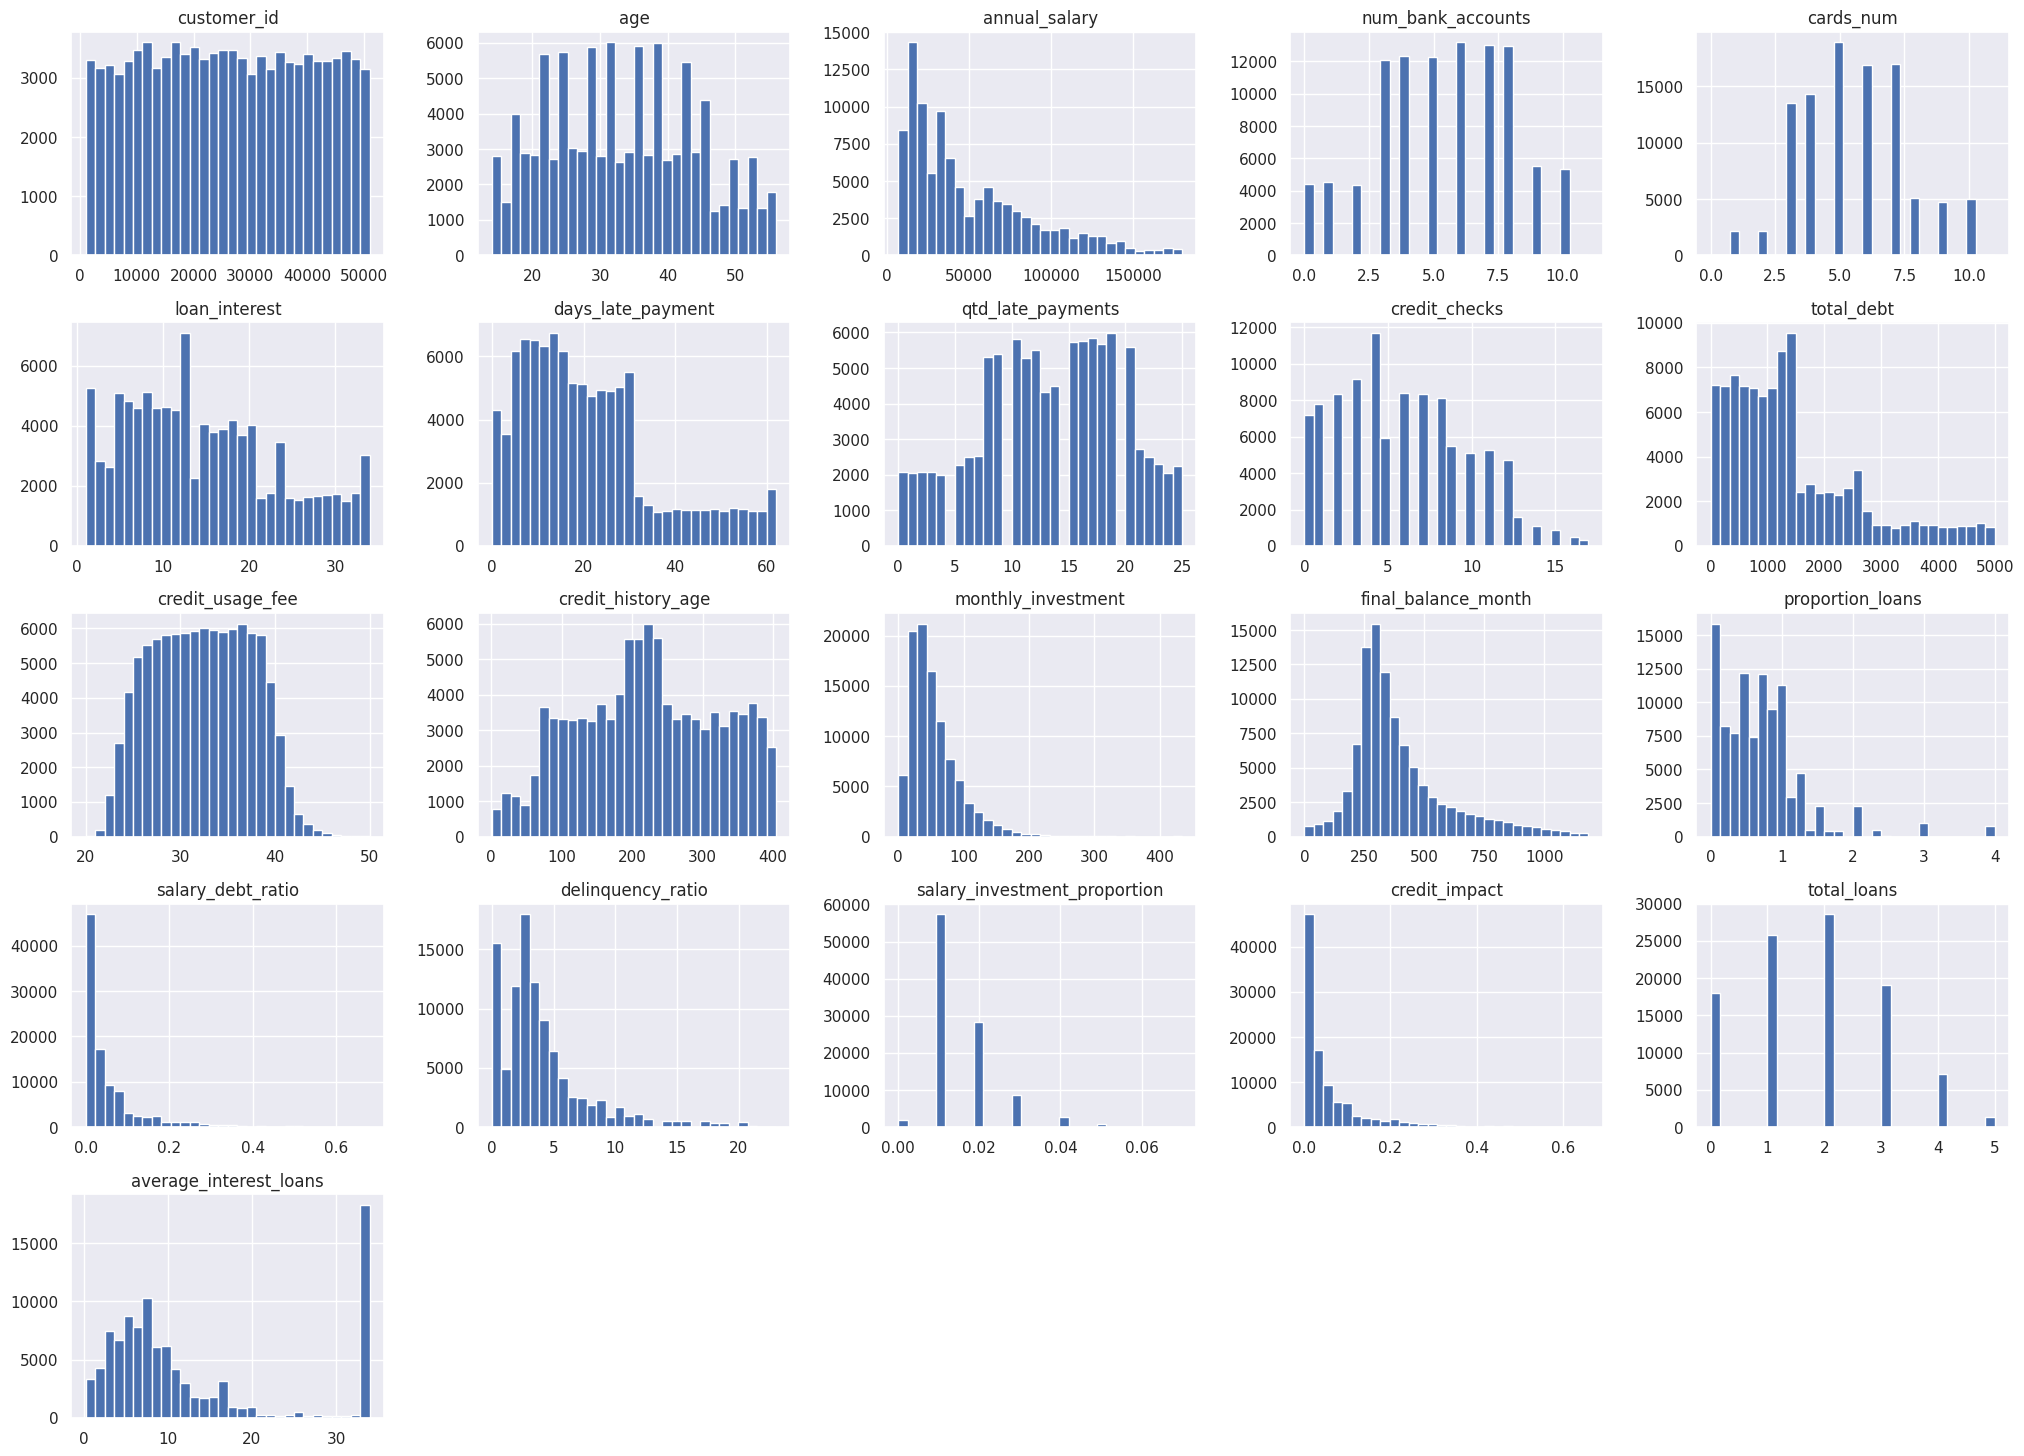

In [558]:
df5.hist(figsize=(25,18), bins = 30)
plt.show()